<a href="https://colab.research.google.com/github/JanithRankelum/OBD2-Prediction-Analysis/blob/master/OBD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install flask_ngrok

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error
from flask import Flask, request, jsonify
import joblib
from google.colab import files
from flask_ngrok import run_with_ngrok

In [45]:
# Upload dataset
df = pd.read_csv("/content/drive/MyDrive/merged_dataset.csv")
df.head()

<ipython-input-45-13e311bf1a2b>:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/merged_dataset.csv")


,ENGINE_RUN_TINE (),ENGINE_RPM (),VEHICLE_SPEED (),THROTTLE (),ENGINE_LOAD (),COOLANT_TEMPERATURE (),LONG_TERM_FUEL_TRIM_BANK_1 (),SHORT_TERM_FUEL_TRIM_BANK_1 (),INTAKE_MANIFOLD_PRESSURE (),FUEL_TANK (),...,INTAKE_AIR_TEMP (),TIMING_ADVANCE (),CATALYST_TEMPERATURE_BANK1_SENSOR1 (),CATALYST_TEMPERATURE_BANK1_SENSOR2 (),CONTROL_MODULE_VOLTAGE (),COMMANDED_EVAPORATIVE_PURGE (),TIME_RUN_WITH_MIL_ON (),TIME_SINCE_TROUBLE_CODES_CLEARED (),DISTANCE_TRAVELED_WITH_MIL_ON (),WARM_UPS_SINCE_CODES_CLEARED ()
0,0.0,0.0,17.647058,0.0,25.0,-2.34375,0.0,101.0,36.07843,49.803921,...,5.0,434.700012,295.100006,12.324,0.0,0.0,7835.0,0.0,255.0,NaN
1,0.0,0.0,17.647058,0.0,25.0,-2.34375,0.0,101.0,36.07843,49.803921,...,5.0,434.700012,295.100006,12.343,0.0,0.0,7835.0,0.0,255.0,NaN
2,0.0,0.0,17.647058,0.0,25.0,-2.34375,0.0,101.0,36.07843,49.803921,...,5.0,434.700012,295.100006,12.343,0.0,0.0,7835.0,0.0,255.0,NaN
3,0.0,0.0,18.039215,0.0,25.0,-2.34375,0.0,101.0,36.07843,49.803921,...,5.0,434.700012,295.100006,12.343,0.0,0.0,7835.0,0.0,255.0,NaN
4,0.0,0.0,18.039215,0.0,25.0,-2.34375,0.0,101.0,36.07843,49.803921,...,5.0,434.700012,295.100006,12.343,0.0,0.0,7835.0,0.0,255.0,NaN


In [46]:
df.isnull().sum()

,0
ENGINE_RUN_TINE (),0
ENGINE_RPM (),0
VEHICLE_SPEED (),0
THROTTLE (),0
ENGINE_LOAD (),0
COOLANT_TEMPERATURE (),0
LONG_TERM_FUEL_TRIM_BANK_1 (),0
SHORT_TERM_FUEL_TRIM_BANK_1 (),0
INTAKE_MANIFOLD_PRESSURE (),0
FUEL_TANK (),0


In [47]:
# Data Preprocessing
## Clean column names by removing spaces and parentheses
df.columns = df.columns.str.replace(r"[\s()]", "", regex=True)

In [48]:
df.columns

Index(['ENGINE_RUN_TINE', 'ENGINE_RPM', 'VEHICLE_SPEED', 'THROTTLE',
       'ENGINE_LOAD', 'COOLANT_TEMPERATURE', 'LONG_TERM_FUEL_TRIM_BANK_1',
       'SHORT_TERM_FUEL_TRIM_BANK_1', 'INTAKE_MANIFOLD_PRESSURE', 'FUEL_TANK',
       'ABSOLUTE_THROTTLE_B', 'PEDAL_D', 'PEDAL_E',
       'COMMANDED_THROTTLE_ACTUATOR', 'FUEL_AIR_COMMANDED_EQUIV_RATIO',
       'ABSOLUTE_BAROMETRIC_PRESSURE', 'RELATIVE_THROTTLE_POSITION',
       'INTAKE_AIR_TEMP', 'TIMING_ADVANCE',
       'CATALYST_TEMPERATURE_BANK1_SENSOR1',
       'CATALYST_TEMPERATURE_BANK1_SENSOR2', 'CONTROL_MODULE_VOLTAGE',
       'COMMANDED_EVAPORATIVE_PURGE', 'TIME_RUN_WITH_MIL_ON',
       'TIME_SINCE_TROUBLE_CODES_CLEARED', 'DISTANCE_TRAVELED_WITH_MIL_ON',
       'WARM_UPS_SINCE_CODES_CLEARED'],
      dtype='object')

In [49]:
df.drop(columns=["WARM_UPS_SINCE_CODES_CLEARED"], inplace=True)

In [50]:
df.dropna(inplace=True)

In [51]:
df.isnull().sum()

,0
ENGINE_RUN_TINE,0
ENGINE_RPM,0
VEHICLE_SPEED,0
THROTTLE,0
ENGINE_LOAD,0
COOLANT_TEMPERATURE,0
LONG_TERM_FUEL_TRIM_BANK_1,0
SHORT_TERM_FUEL_TRIM_BANK_1,0
INTAKE_MANIFOLD_PRESSURE,0
FUEL_TANK,0


In [52]:
df.shape

(94993, 26)

In [53]:
## Define features
features = ["COOLANT_TEMPERATURE", "ENGINE_LOAD", "ENGINE_RPM",
            "FUEL_TANK", "VEHICLE_SPEED", "ENGINE_RUN_TINE",
            "INTAKE_AIR_TEMP", "INTAKE_MANIFOLD_PRESSURE"]

In [55]:
## Ensure all features exist in the dataset
features = [col for col in features if col in df.columns]


In [56]:
# Feature Engineering
## Create synthetic target variables
df["ENGINE_HEALTH"] = np.where((df["ENGINE_RPM"] > 1500) &
                             (df["COOLANT_TEMPERATURE"].between(80, 110)) &
                             (df["ENGINE_LOAD"] < 50), 1, 0)

df["FUEL_CONSUMPTION"] = df["ENGINE_LOAD"] * 0.2 + df["ENGINE_RPM"] * 0.001 + np.random.normal(0, 0.5, len(df))

df["MILEAGE"] = 100 - (df["ENGINE_LOAD"] * 0.15 + df["ENGINE_RPM"] * 0.0005 + np.random.normal(0, 2, len(df)))

In [57]:
# Display summary statistics for selected columns
#print(df[["ENGINE_HEALTH", "FUEL_CONSUMPTION", "MILEAGE"]].describe())

# Count unique values for each column
for col in ["ENGINE_HEALTH", "FUEL_CONSUMPTION", "MILEAGE"]:
    print(f"\nUnique value counts for {col}:\n", df[col].value_counts())


Unique value counts for ENGINE_HEALTH:
 ENGINE_HEALTH
0    91793
1     3200
Name: count, dtype: int64

Unique value counts for FUEL_CONSUMPTION:
 FUEL_CONSUMPTION
7.747249    1
7.605710    1
7.253560    1
7.333417    1
8.145384    1
           ..
5.148717    1
4.988904    1
4.795186    1
5.362245    1
4.131901    1
Name: count, Length: 94993, dtype: int64

Unique value counts for MILEAGE:
 MILEAGE
96.943646     1
95.350567     1
95.113391     1
95.589440     1
95.828630     1
             ..
94.544324     1
96.678118     1
95.712160     1
96.984201     1
100.106671    1
Name: count, Length: 94993, dtype: int64


In [58]:
# Splitting data
X = df[features]

In [61]:
from imblearn.over_sampling import SMOTE

# Define features and target
X = df[features]
y_engine_health = df["ENGINE_HEALTH"]

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y_engine_health)

# Check class balance
print(pd.Series(y_balanced).value_counts())  # Ensure balance before proceeding

# Now, split the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train the model
engine_health_model = RandomForestClassifier(n_estimators=100, random_state=42)
engine_health_model.fit(X_train, y_train)

# Evaluate performance
y_pred = engine_health_model.predict(X_test)
engine_health_acc = accuracy_score(y_test, y_pred)

# Save the trained model
joblib.dump(engine_health_model, "engine_health_model.pkl")


# Print accuracy
print(f"Engine Health Model Accuracy after SMOTE: {engine_health_acc}")


ENGINE_HEALTH
0    91793
1    91793
Name: count, dtype: int64
Engine Health Model Accuracy after SMOTE: 1.0


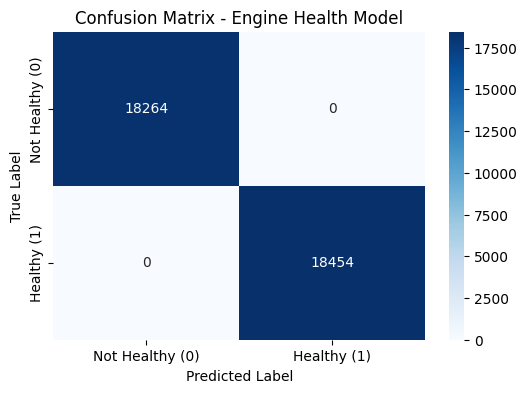

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18264
           1       1.00      1.00      1.00     18454

    accuracy                           1.00     36718
   macro avg       1.00      1.00      1.00     36718
weighted avg       1.00      1.00      1.00     36718



In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get model predictions
y_pred = engine_health_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Healthy (0)", "Healthy (1)"], yticklabels=["Not Healthy (0)", "Healthy (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Engine Health Model")
plt.show()

# Print classification report for detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))


Mean Absolute Error (MAE): 0.45431369869749266
Mean Squared Error (MSE): 0.3246655719553324
R² Score: 0.9758069888555325


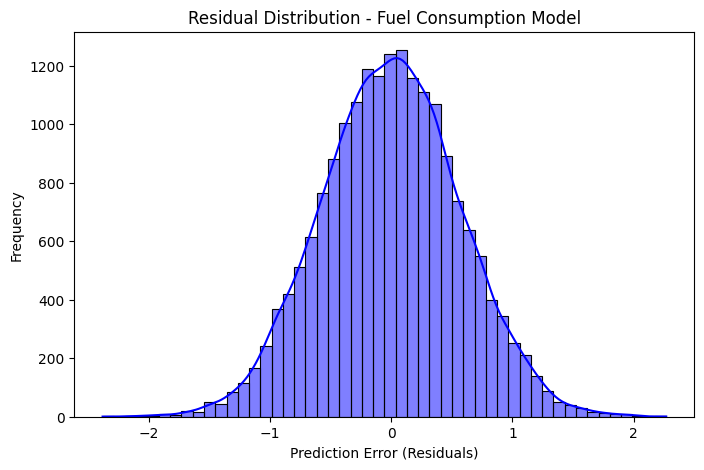

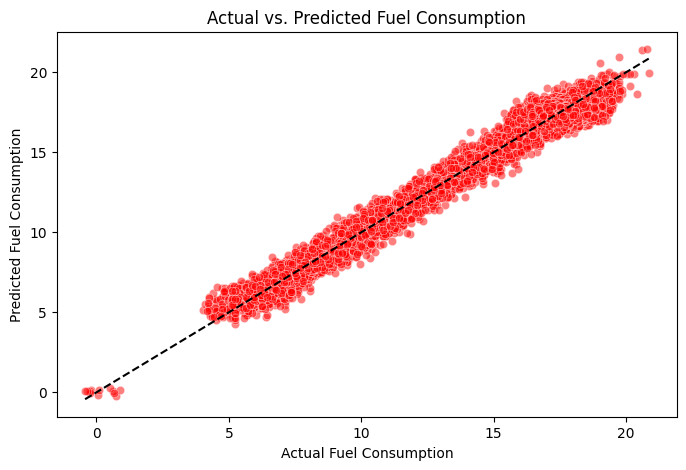

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Train Fuel Consumption Model
y_fuel = df["FUEL_CONSUMPTION"]
X_train, X_test, y_train, y_test = train_test_split(X, y_fuel, test_size=0.2, random_state=42)

fuel_model = RandomForestRegressor(n_estimators=100, random_state=42)
fuel_model.fit(X_train, y_train)

# Get predictions
y_pred = fuel_model.predict(X_test)

# Compute regression evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Save the trained model
joblib.dump(fuel_model, "fuel_consumption_model.pkl")

# -----------------------------
# 🔹 Visualization
# -----------------------------

# Residual Plot (Error Distribution)
plt.figure(figsize=(8, 5))
sns.histplot(y_test - y_pred, bins=50, kde=True, color="blue")
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution - Fuel Consumption Model")
plt.show()

# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="red")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="black")
plt.xlabel("Actual Fuel Consumption")
plt.ylabel("Predicted Fuel Consumption")
plt.title("Actual vs. Predicted Fuel Consumption")
plt.show()


Mean Absolute Error (MAE): 1.8126872132993024
Mean Squared Error (MSE): 5.163001155321182
R² Score: 0.5632023604999266


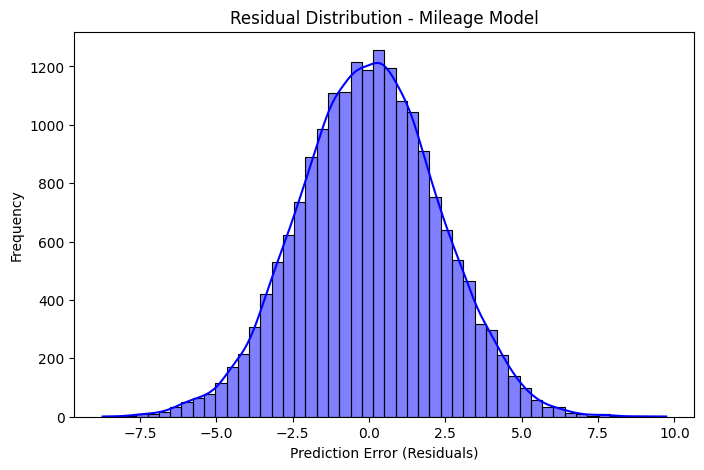

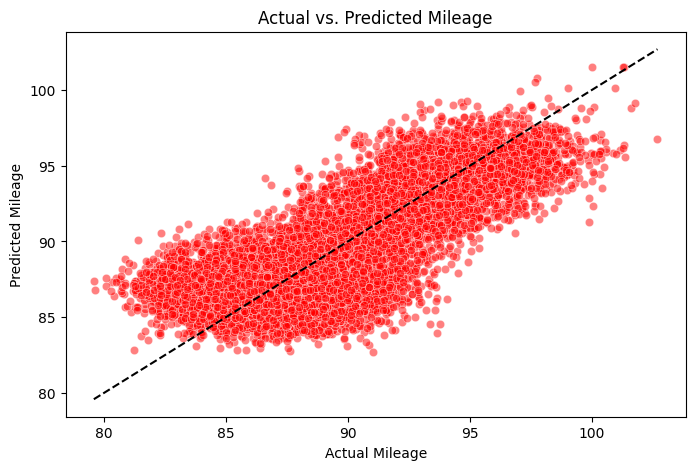

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Train Mileage Model
y_mileage = df["MILEAGE"]
X_train, X_test, y_train, y_test = train_test_split(X, y_mileage, test_size=0.2, random_state=42)

mileage_model = RandomForestRegressor(n_estimators=100, random_state=42)
mileage_model.fit(X_train, y_train)

# Get predictions
y_pred = mileage_model.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Save the trained model
joblib.dump(mileage_model, "mileage_model.pkl")

# -----------------------------
# 🔹 Visualization
# -----------------------------

# Residual Plot (Error Distribution)
plt.figure(figsize=(8, 5))
sns.histplot(y_test - y_pred, bins=50, kde=True, color="blue")
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution - Mileage Model")
plt.show()

# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="red")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="black")
plt.xlabel("Actual Mileage")
plt.ylabel("Predicted Mileage")
plt.title("Actual vs. Predicted Mileage")
plt.show()


In [65]:
!pip install flask flask-ngrok pyngrok joblib


In [66]:
import numpy as np
import joblib
import json
from flask import Flask, request, jsonify
from pyngrok import ngrok   # For exposing Flask in Colab


FileNotFoundError: [Errno 2] No such file or directory: 'engine_health_model.pkl'

In [67]:
features = ["COOLANT_TEMPERATURE", "ENGINE_LOAD", "ENGINE_RPM",
            "FUEL_TANK", "VEHICLE_SPEED", "ENGINE_RUN_TINE",
            "INTAKE_AIR_TEMP", "INTAKE_MANIFOLD_PRESSURE"]


In [68]:
!ngrok authtoken 2uWwu1TdwIzAHbG2k9Hq1QYmnDi_3wdNR88knSX1MWqZs34XU


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [74]:
# Install required libraries (Run this only once)
!pip install flask-ngrok pyngrok joblib


In [75]:
# Import Libraries
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok  # Required for running Flask in Colab
import joblib
import numpy as np

In [76]:
# Define Features (Ensure they match model training)
features = ["COOLANT_TEMPERATURE", "ENGINE_LOAD", "ENGINE_RPM",
            "FUEL_TANK", "VEHICLE_SPEED", "ENGINE_RUN_TINE",
            "INTAKE_AIR_TEMP", "INTAKE_MANIFOLD_PRESSURE"]


In [78]:
# Load trained models
engine_health_model = joblib.load("engine_health_model.pkl")
fuel_model = joblib.load("fuel_consumption_model.pkl")
mileage_model = joblib.load("mileage_model.pkl")

In [ ]:
# ✅ Initialize Flask App
app = Flask(__name__)
run_with_ngrok(app)  # Required for Google Colab

@app.route("/")
def home():
    return jsonify({"message": "Vehicle Maintenance Prediction API is running!"})

@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.json  # Get input JSON
        input_data = np.array([data[feature] for feature in features]).reshape(1, -1)

        # ✅ Make Predictions
        predictions = {
            "engine_health": int(engine_health_model.predict(input_data)[0]),
            "fuel_consumption": float(fuel_model.predict(input_data)[0]),
            "mileage": float(mileage_model.predict(input_data)[0])
        }

        return jsonify(predictions)

    except Exception as e:
        return jsonify({"error": str(e)})  # Handle errors

# ✅ Run Flask App with Ngrok
if __name__ == "__main__":
    ngrok.set_auth_token("2uWwu1TdwIzAHbG2k9Hq1QYmnDi_3wdNR88knSX1MWqZs34XU")  # Replace with your actual Ngrok token
    public_url = ngrok.connect(5000)  # Expose port 5000
    print(f"🚀 Public API URL: {public_url}")
    app.run()

🚀 Public API URL: NgrokTunnel: "https://fdb6-34-80-122-124.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://93da-34-80-122-124.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [28/Mar/2025 16:57:05] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/Mar/2025 16:57:06] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [28/Mar/2025 17:03:35] "POST / HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [28/Mar/2025 17:04:23] "POST / HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [28/Mar/2025 17:08:50] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/Mar/2025 17:09:28] "POST / HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [28/Mar/2025 17:12:03] "POST / HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [28/Mar/2025 17:12:30] "POST / HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [28/Mar/2025 17:12:45] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/Mar/2025 17:13:27] "POST / HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [28/Mar/2025 17:13:58] "POST / HTTP/1.1" 405 -
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f